### show image

In [1]:
def myshow(img, title=None, margin=0.05, dpi=100):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (4 + margin) * ysize / dpi, (4 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
   
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

### load data

In [3]:
import os,time
import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline

%run update_path_to_download_script
#from downloaddata import fetch_data as fdata

#from downloaddata import fetch_data_all
import numpy as np

# import tensorflow as tf
# import tensorlayer as tl
# from tensorlayer.layers import *

inputDir = '../data/train'
outputDir = 'output'

ERROR:root:File `'update_path_to_download_script.py'` not found.


In [10]:
def loadData( inputDir, padding=0 ):
    imageflairFilenames = glob.glob(os.path.join(inputDir, "Utrecht", "*","pre","FLAIR.nii.gz"))
    imageT1Filenames = glob.glob(os.path.join(inputDir, "Utrecht", "*","pre","T1.nii.gz"))
    labelFilenames= glob.glob(os.path.join(inputDir, "Utrecht", "*","wmh.nii.gz"))
    images = None # shape: (numImages, z, y, x, channels=1)
    labels = None
    masks  = None
    print(len(imageflairFilenames))
    for imageflairFilenames, imageT1Filenames, labelFilenames in zip(imageflairFilenames, imageT1Filenames, labelFilenames):
        # Load the images
        flairImage = sitk.ReadImage(imageflairFilenames)
        T1Image = sitk.ReadImage(imageT1Filenames)
        labelImage = sitk.ReadImage(labelFilenames)
        # Convert to arrays
        flairArray = np.pad(sitk.GetArrayFromImage(flairImage), [(0,0),(padding,padding),(padding,padding)], 'constant')
        T1Array = np.pad(sitk.GetArrayFromImage(T1Image), [(0,0),(padding,padding),(padding,padding)], 'constant')
        labelArray = np.pad(sitk.GetArrayFromImage(labelImage), [(0,0),(padding,padding),(padding,padding)], 'constant')
        maskArray = labelArray > 0
        print("flairArray",flairArray.shape)
        print("T1Array",T1Array.shape)
        print("labelArray",labelArray.shape)
        print("maskArray",maskArray.shape)
        # Add to the images/labels array
        if images is None:
            images = flairArray.reshape([1] + list(flairArray.shape) + [1])
            images = np.concatenate([images, T1Array.reshape([1] + list(T1Array.shape) + [1])], axis=4)
            labels = labelArray.reshape([1] + list(labelArray.shape) + [1])
            masks  = maskArray.reshape([1] + list(maskArray.shape) + [1])
        else:
            tempArray = np.concatenate([flairArray.reshape([1] + list(flairArray.shape) + [1]), T1Array.reshape([1] + list(T1Array.shape) + [1])], axis=4)
            
            images = np.concatenate([images, tempArray])
            
            labels = np.concatenate([labels, labelArray.reshape([1] + list(labelArray.shape) + [1])])
            masks  = np.concatenate([masks, maskArray.reshape([1] + list(maskArray.shape) + [1])])
                    
    return images, labels, masks

In [152]:
testImages, testLabels, testMasks = loadData(inputDir)
testNonZeroIdx = np.nonzero(testMasks)

15
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 240)
flairArray (48, 240, 240)
T1Array (48, 240, 240)
labelArray (48, 240, 240)
maskArray (48, 240, 24

In [155]:
testLabels.max()

2.0

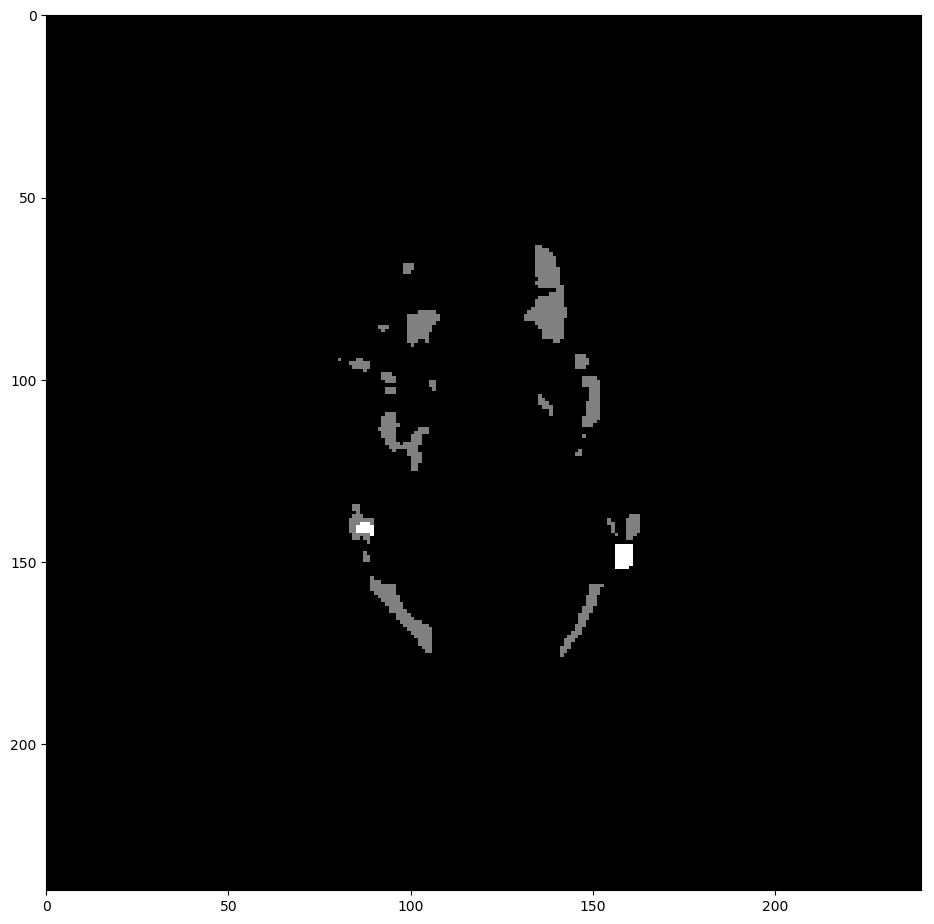

In [7]:
myshow(sitk.GetImageFromArray(y))

### select data

In [137]:
images = []
lables = []

In [156]:
for i in range(15):
    for j in range(48):
        if not np.all(testMasks[i,j,:,:,0]== False):
            lables.append(testLabels[i,j,:,:,:])
            images.append(testImages[i,j,:,:,:])


In [157]:
lables[2].shape

(240, 240, 1)

In [158]:
images[2].shape

(240, 240, 2)

In [181]:
X = np.asarray(images)
y = np.asarray(lables).astype(int)

print(X.shape, X.min(), X.max()) # (240, 240, 4) -0.380588 2.62761
print(y.shape, y.min(), y.max()) # (240, 240, 1) 0 1 

(804, 240, 240, 2) 0.0 3168.0
(804, 240, 240, 1) 0 2


In [184]:
X.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [210]:
y[y >1] = 0

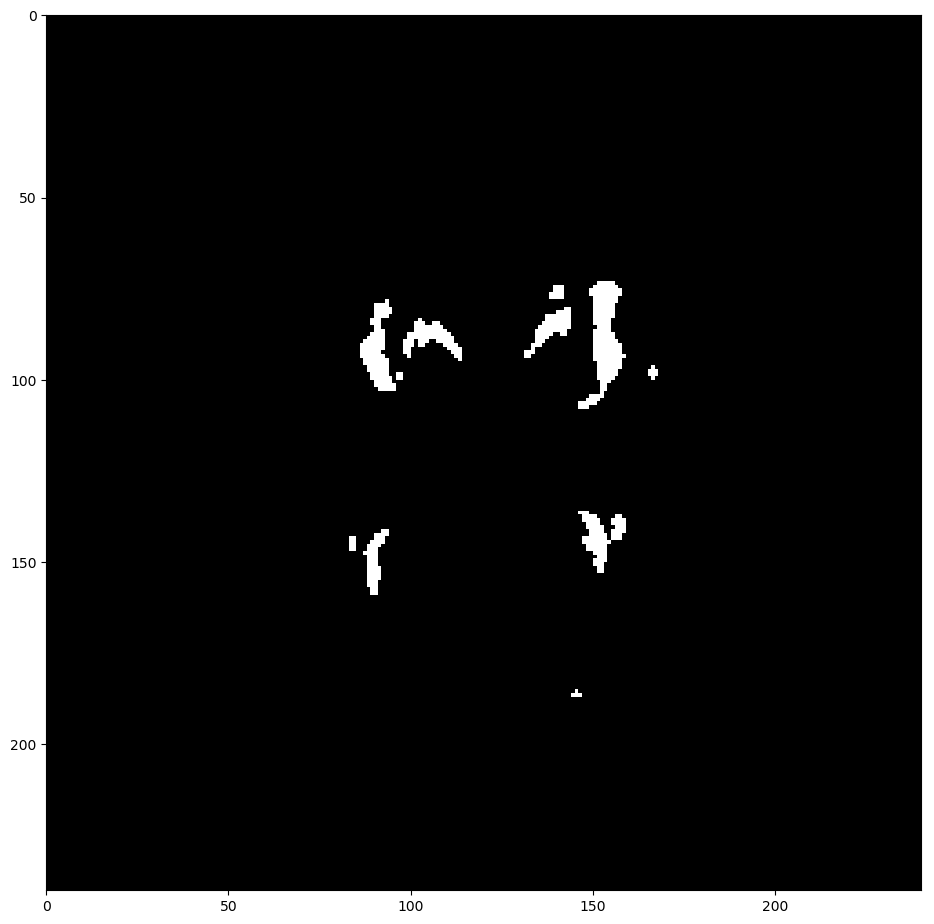

In [163]:
myshow(sitk.GetImageFromArray(y[340,:,:,0]))

### reshape data in the model

### mask

### shuffle data pack data

In [213]:
from random import shuffle

def shuffle_list(*ls):
    l =list(zip(*ls))
    shuffle(l)
    return zip(*l)

# a = [0,1,2,3,4]
# b = [5,6,7,8,9]
# a1,b1 = shuffle_list(a,b)
# print(a1,b1)
Xs,ys = shuffle_list(X,y)
Xs= np.array(Xs)
ys= np.array(ys)
print(Xs.shape)
print(ys.shape)


(804, 240, 240, 2)
(804, 240, 240, 1)


In [214]:
ys.max()

1

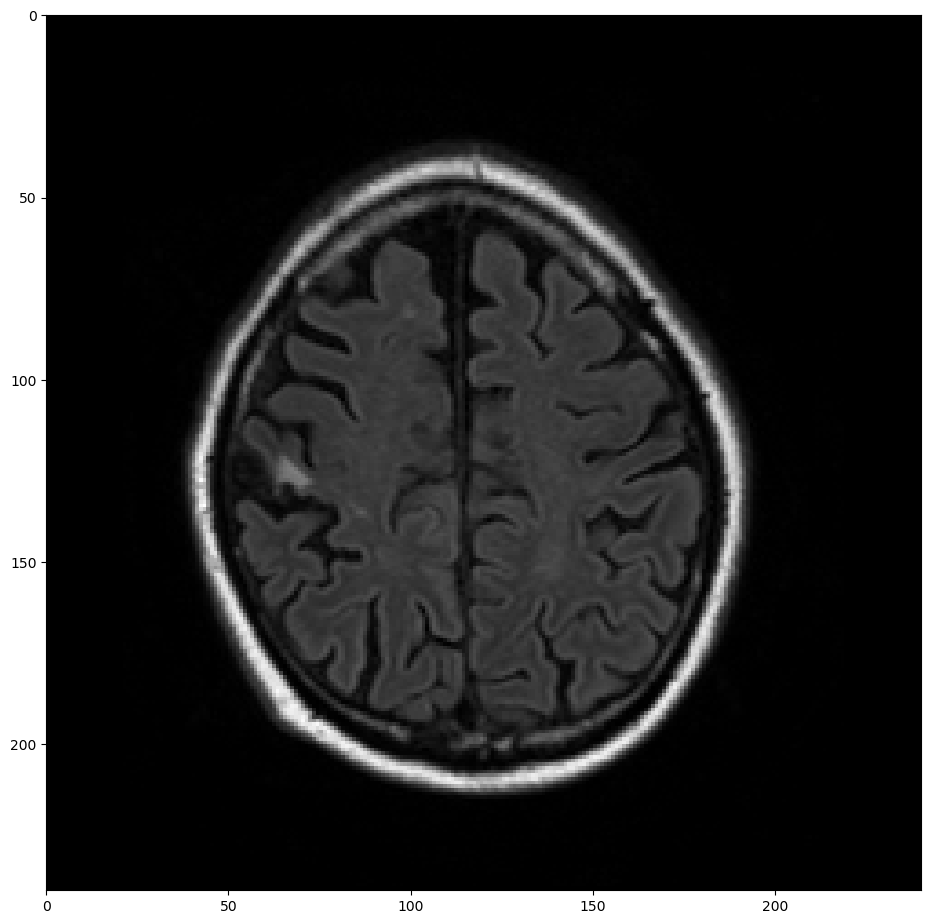

In [215]:
myshow(sitk.GetImageFromArray(X[20,:,:,0]))

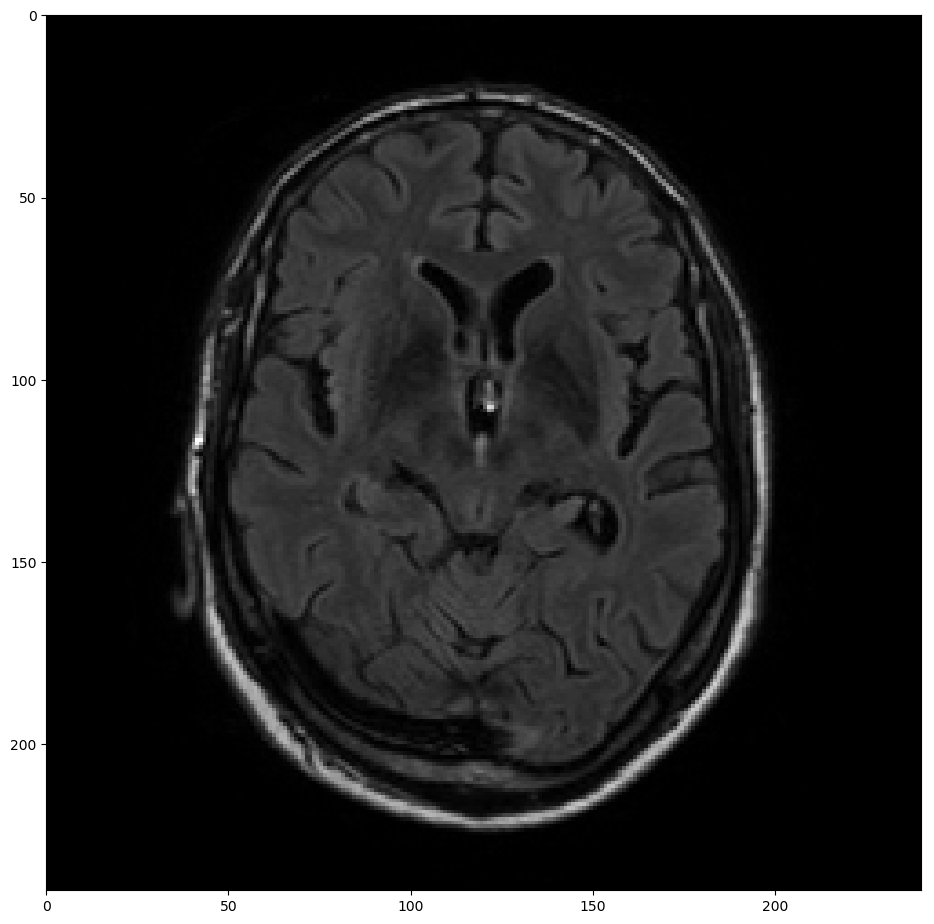

In [216]:
myshow(sitk.GetImageFromArray(Xs[20,:,:,0]))

### change label to binaray y[y >1] = 0

## U net

In [224]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout,UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K

C:\Users\Jing\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [217]:
def get_unet():
    inputs = Input(batchShape[1:])
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = -1)
    conv6 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = -1)
    conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = -1)
    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = -1)
    conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)


    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    model.summary()
    return model

In [231]:
def preprocess(imgs):
    print("pree",imgs.shape, imgs.shape[:-1])
    imgs_p = np.ndarray((imgs.shape[0],img_rows, img_cols,imgs.shape[-1]), dtype=np.uint8)
#     print("imgs.shape[0]",imgs.shape[0])
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i],(img_cols, img_rows,imgs.shape[-1]), preserve_range=True)
  
#     print("imgs_p",imgs_p.shape)
    return imgs_p

In [273]:
def train_and_predict(X,y):
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = np.array(X), np.array(y)#load_train_data()
#     myshow(sitk.GetImageFromArray(imgs_train[:,:,0]))
#     myshow(sitk.GetImageFromArray(imgs_train[:,:,1]))
#     myshow(sitk.GetImageFromArray(imgs_mask_train))
#     print("shape before",imgs_train.shape,imgs_mask_train.shape)
#     myshow(sitk.GetImageFromArray(imgs_train))

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)
#     print("shapeagfter",imgs_train.shape,imgs_mask_train.shape)
#     myshow(sitk.GetImageFromArray(imgs_train))

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

    print('-'*30)
    print('Fitting model...')
    print('-'*30)
# #     myshow(sitk.GetImageFromArray(imgs_train))
#     myshow(sitk.GetImageFromArray(imgs_mask_train))
#     print("before model",imgs_train.shape,imgs_mask_train.shape)
    model.fit(imgs_train, imgs_mask_train, batch_size=20, nb_epoch=3, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])
    
    
    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    testrange = [500,505]
    imgs_test, imgs_id_test = Xs[testrange,:,:,:], ys[testrange,:,:,:]
#     print("before test pre",imgs_test.shape,imgs_id_test)
    imgs_test = preprocess(imgs_test)
#     print("after test pre",imgs_test.shape,imgs_id_test)
    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
#     print("test model",imgs_test.shape)
    imgs_mask_test = model.predict(imgs_test, verbose=1)
    print("test model finished",imgs_mask_test.shape)
    np.save('imgs_mask_test.npy', imgs_mask_test)
    myshow(sitk.GetImageFromArray(imgs_test[1,:,:,1]))
    myshow(sitk.GetImageFromArray(imgs_mask_test[1,:,:,0]))
    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test, testrange):
#         print(image_id)
        nn = 0
#         print(image.shape)
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir,str(image_id) + '_pred.png'), image)
        nn+=1

In [274]:
img_rows =256
img_cols =256

smooth = 1.

batchSize = 20
batchShape = (batchSize, 256,256, 2)

In [275]:
chunks = [range(x,x+100) for x in range(0, len(Xs), 100)]

In [276]:
chunks[8]

range(800, 900)

------------------------------
Loading and preprocessing train data...
------------------------------
pree (100, 240, 240, 2) (100, 240, 240)


C:\Users\Jing\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Jing\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


pree (100, 240, 240, 1) (100, 240, 240)
------------------------------
Creating and compiling model...
------------------------------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 2)  0                                            
__________________________________________________________________________________________________
conv2d_97 (Conv2D)              (None, 256, 256, 32) 608         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_97[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 128, 128, 32) 0           conv2d_98

C:\Users\Jing\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 80 samples, validate on 20 samples
Epoch 1/3
80/80 [==============================] - 74s 925ms/step - loss: 0.4130 - acc: 0.9020 - val_loss: 0.2441 - val_acc: 0.9926
Epoch 2/3
80/80 [==============================] - 71s 884ms/step - loss: 0.1822 - acc: 0.9955 - val_loss: 0.1376 - val_acc: 0.9955
Epoch 3/3
80/80 [==============================] - 72s 904ms/step - loss: 0.0729 - acc: 0.9975 - val_loss: 0.0676 - val_acc: 0.9955
------------------------------
Loading and preprocessing test data...
------------------------------
pree (2, 240, 240, 2) (2, 240, 240)
------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
2/2 [==============================] - 1s 420ms/step
test model finished (2, 256, 256, 1)
------------------------------
Saving predicted masks to files...
------------------------------
------------------------------
Loading and preprocessi

Train on 80 samples, validate on 20 samples
Epoch 1/3
60/80 [=====================>........] - ETA: 17s - loss: 0.7211 - acc: 0.9105

KeyboardInterrupt: 

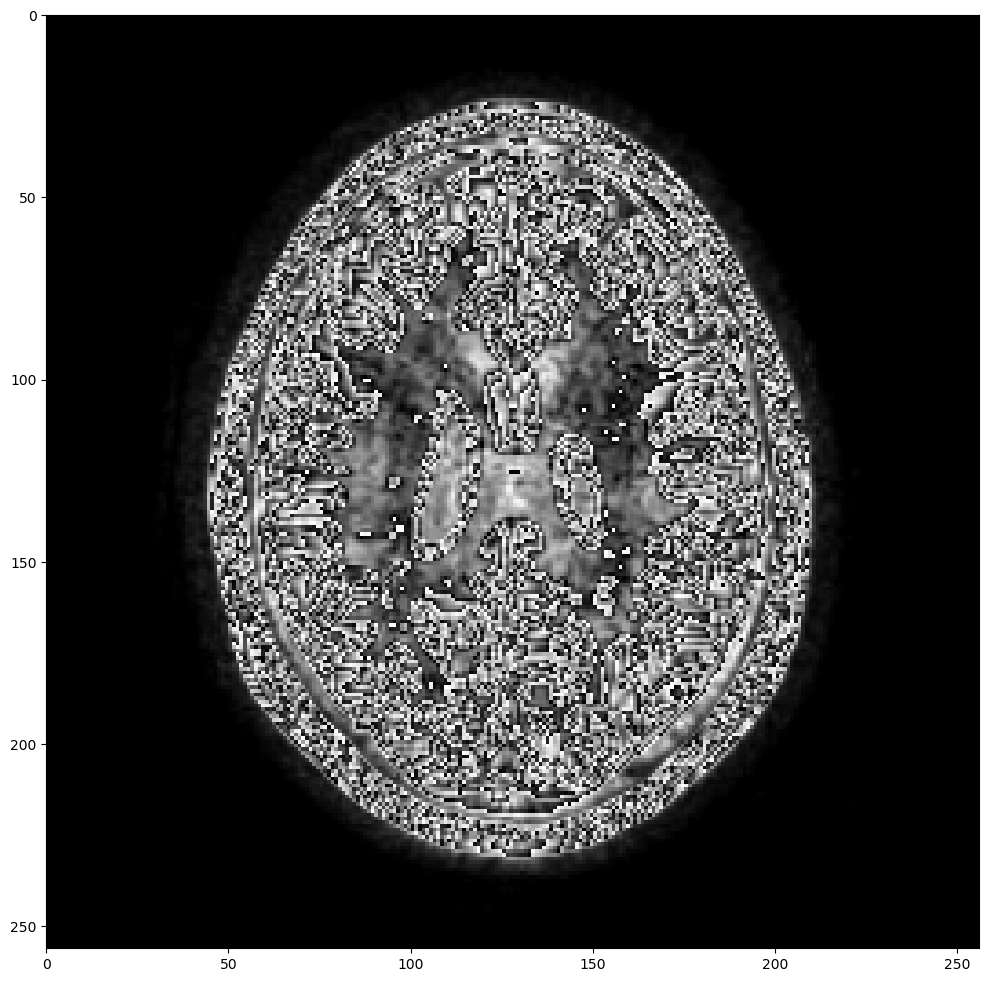

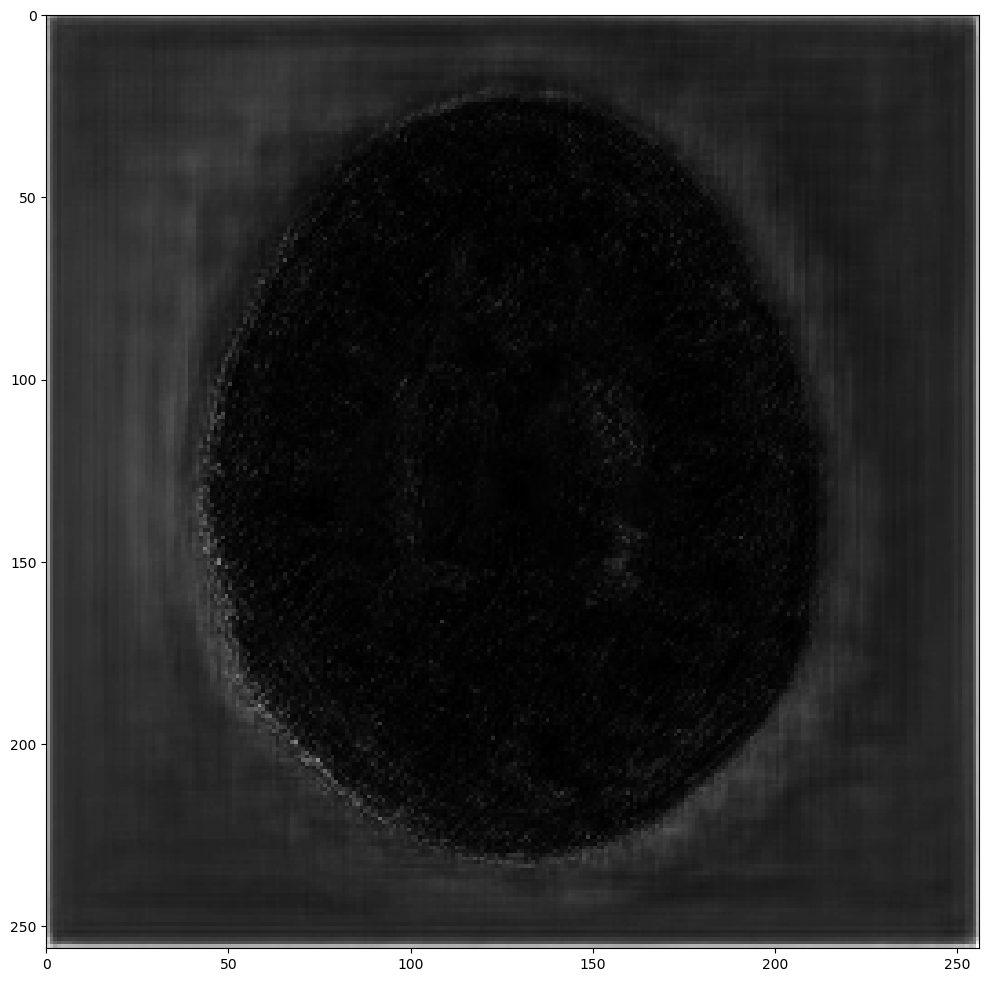

In [277]:
if __name__ == '__main__':
    for i,j in zip(Xchunks,ychunks):
        train_and_predict(i,j)

In [265]:

Xchunks = [Xs[x:x+100] for x in range(0, len(Xs), 100)]
ychunks = [ys[x:x+100] for x in range(0, len(ys), 100)]



In [264]:
Xs[10:30,:,:,:].shape

(20, 240, 240, 2)

In [262]:
Xchunks[8].shape

(4, 240, 240, 2)

In [266]:
ychunks[8].shape

(4, 240, 240, 1)

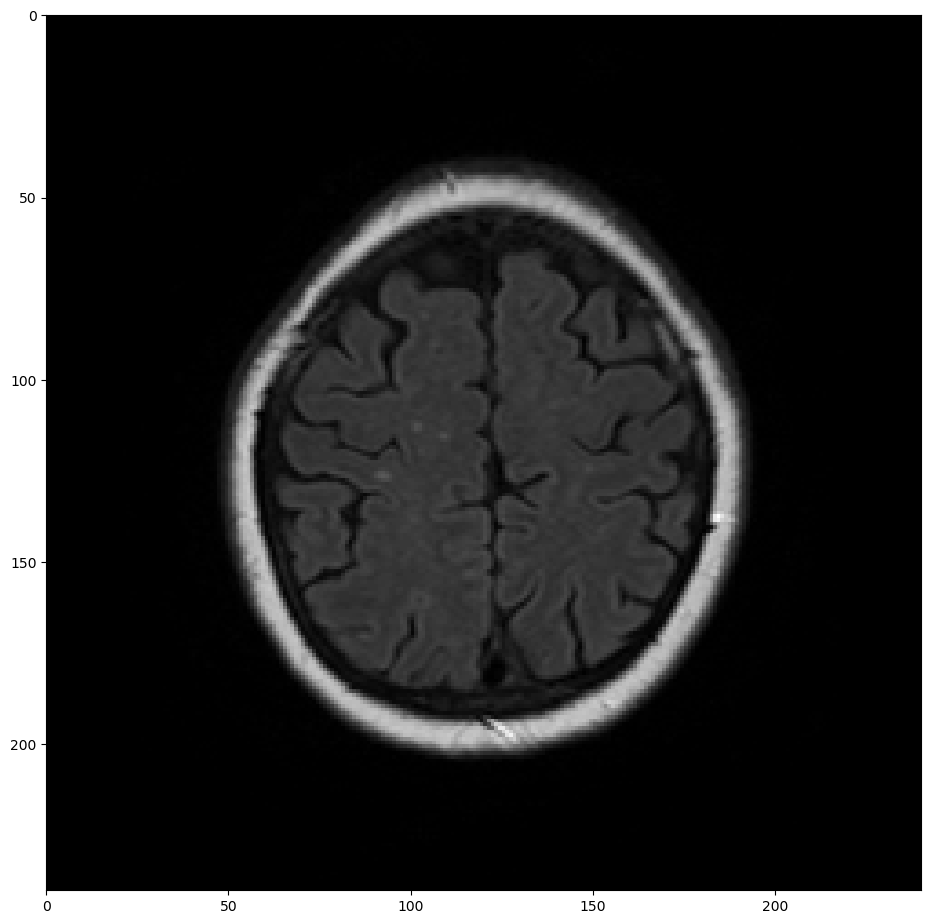

In [270]:
myshow(sitk.GetImageFromArray(Xchunks[8][0,:,:,0]))

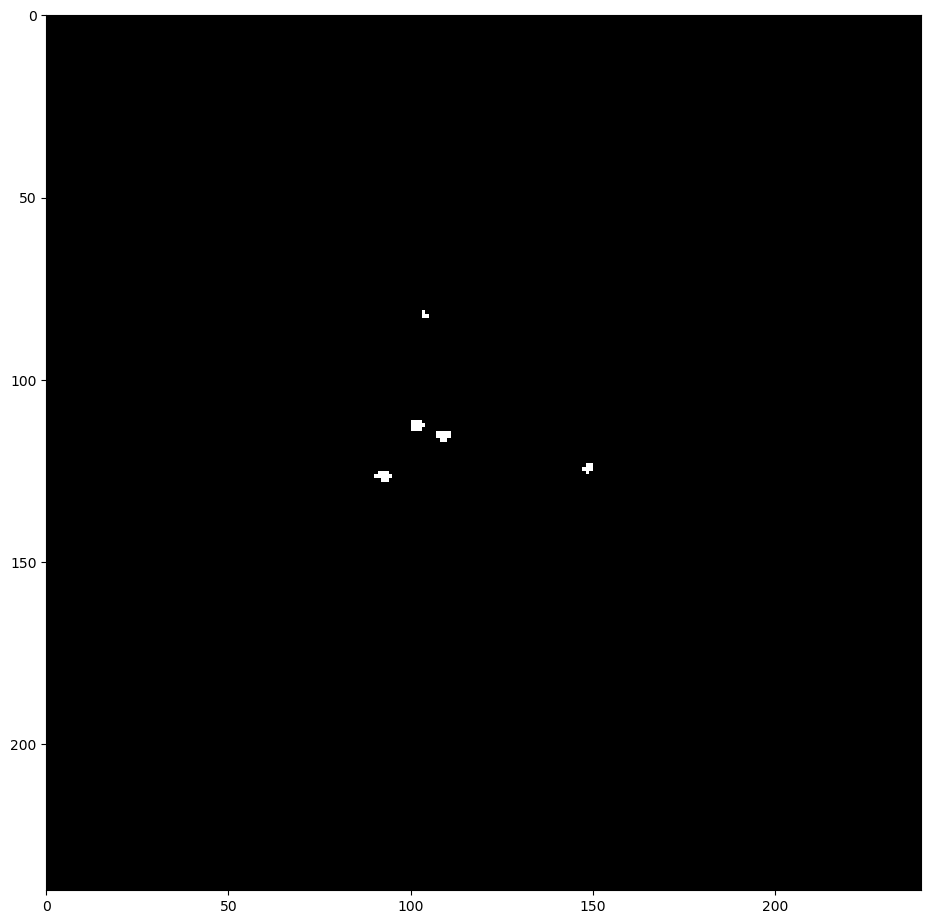

In [271]:
myshow(sitk.GetImageFromArray(ychunks[8][0,:,:,0]))